In [44]:
import os
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
# from tensorflow import keras

# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras import optimizers

import skimage as ski
from skimage.transform import resize
from sklearn.model_selection import train_test_split

### Convert images from pixals into data, then use pretrained model to accurately classify the stocks
- Mathematical detection algorithms are at best 84% accurate. Goal is to 
- https://www.tensorflow.org/tutorials/images/transfer_learning
- Make a requirements text file
- We do not apply data augmentation because we already have patterns classified as up or down, and flipping them would be counter intuitive

### Working with a pretrained model:
- Feature Extraction
    - Add new classifiers
- Fine-Tuning
    - Unfreeze a few of the top layers

In [48]:
gc.collect()

0

In [6]:
# Global Variables
BATCH_SIZE = 32
IMG_SIZE = (255, 255)

In [54]:
# Paths: For local machine
train_dir = 'C:/Users/Nick/Documents/SchoolStuff/spring2024/machineLearning/final_project/tradingpatterns/stock_patterns/train'
validation_dir = 'C:/Users/Nick/Documents/SchoolStuff/spring2024/machineLearning/final_project/tradingpatterns/stock_patterns/validation'

In [55]:
train_dir

'C:/Users/Nick/Documents/SchoolStuff/spring2024/machineLearning/final_project/tradingpatterns/stock_patterns/train'

In [ ]:
# def mapto1hot():
#     """
#     One hot encoding for the number of categories we will be looking at. 
#     """
#     ytrain_1hot = keras.utils.to_categorical(ytrain, num_classes = len(categories))
#     yval_1hot = keras.utils.to_categorical(yval, num_classes = len(categories))
#     ytest_1hot = keras.utils.to_categorical(ytest, num_classes = len(categories))
#     
#     return ytrain_1hot, yval_1hot, ytest_1hot

In [56]:
# Create training and validation dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 83613 files belonging to 8 classes.
Found 35833 files belonging to 8 classes.


In [ ]:
# Test by printing first ten images from the training dateset
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Create a test set
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

In [ ]:
# Rescale the images from [-1 to 1] vs [0 to 255]
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
# Pixal size is something to take into account for training a model
# Starting with small resolution to be more efficient
# STARTING SIZE IS 480 x 345
# data = []
# labels = []

In [ ]:
# data, labels = convert_images(data, labels)

In [ ]:
# Convert data to numpy array and create test and training set
# data1 = np.asarray(data)
# labels1 = np.asarray(labels)
# 
# # Split data into train and test sets using 42 to make reproducable results
# xtrain, xtest, ytrain, ytest = train_test_split(data1, labels1, test_size=0.2, random_state=42, shuffle=True, stratify=labels1)

In [ ]:
# Normalize the data by dividing 1 by 255 (rgb value)
xtrain = xtrain/255
xtest = xtest/255

# Create validation set
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2)

In [ ]:
# One hot encode our data
ytrain_1hot, yval_1hot, ytest_1hot = mapto1hot()

In [107]:
layers = [
    Flatten(input_shape=(32, 32, 4)),
    tf.keras.layers.Dense(100, activation='relu'), # hidden layer
    tf.keras.layers.Dense(len(categories), activation='softmax') # output layer
]

model = Sequential(layers)

model.compile(optimizer=tf.keras.optimizers.SGD(0.01), # SGD optimizer with learning rate of 0.01
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# This will start the training and save each epoch output in the history list.
history = model.fit(xtrain, ytrain_1hot, batch_size=16, epochs=10, validation_data=(xval, yval_1hot))

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1221 - loss: 2.0798 - val_accuracy: 0.1137 - val_loss: 2.0802
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1291 - loss: 2.0793 - val_accuracy: 0.1137 - val_loss: 2.0805
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1220 - loss: 2.0796 - val_accuracy: 0.1075 - val_loss: 2.0806
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1142 - loss: 2.0795 - val_accuracy: 0.1075 - val_loss: 2.0808
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1256 - loss: 2.0794 - val_accuracy: 0.1075 - val_loss: 2.0810
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1244 - loss: 2.0797 - val_accuracy: 0.1075 - val_loss: 2.0812
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1343 - loss: 2.0789 - val_accuracy: 0.1075 - val_loss: 2.0811
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1241 - loss: 2.0798 - val_accuracy: 0.

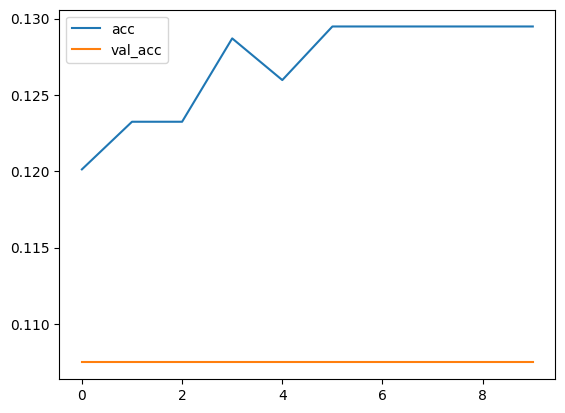

In [106]:
plt.plot(history.history['accuracy'], label="acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.legend()
plt.show()

In [110]:
gc.collect()

0